# Sentiment Analysis with Hugging Face

Hugging Face is an open-source and platform provider of machine learning technologies. You can use install their package to access some interesting pre-built models to use them directly or to fine-tune (retrain it on your dataset leveraging the prior knowledge coming with the first training), then host your trained models on the platform, so that you may use them later on other devices and apps.

Please, [go to the website and sign-in](https://huggingface.co/) to access all the features of the platform.

[Read more about Text classification with Hugging Face](https://huggingface.co/tasks/text-classification)

The Hugging face models are Deep Learning based, so will need a lot of computational GPU power to train them. Please use [Colab](https://colab.research.google.com/) to do it, or your other GPU cloud provider, or a local machine having NVIDIA GPU.

In [1]:
!pip install "accelerate>=0.20.1" -U
!pip install "transformers[torch]" -U


In [2]:
!pip install transformers


In [3]:
 !pip install contractions

In [4]:
!pip install datasets


In [5]:
!pip install huggingface_hub


## Application of Hugging Face Text classification model Fune-tuning

# **Text Processing terms**

### 1. Segmentation

**Definition**: Segmentation is the process of dividing a large chunk of text into smaller units like sentences or paragraphs.



### 2. Tokenization

**Definition**: Tokenization is the process of breaking down text into smaller pieces, commonly known as tokens. These tokens are typically words or subwords.



### 3. Lemmatization

**Definition**: Lemmatization is the process of converting a word to its base or root form. For instance, "running" becomes "run".



### 4. Stop Words

**Definition**: Stop words are common words (e.g., "and", "the", "is") that might not carry significant meaning in certain text processing tasks.


### 5. Stemming

**Definition**: Stemming is the process of reducing words to their root form by removing prefixes or suffixes. Unlike lemmatization, it might not always produce valid words.



### 6. Part-of-Speech Tagging

**Definition**: Part-of-Speech (POS) Tagging assigns a part-of-speech label (e.g., noun, verb, adjective) to each token in a text.



To handle these stages, you might need to install and download certain resources from `nltk`. This can be done using:

```python
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
```


Read more about the fine-tuning concept : [here](https://deeplizard.com/learn/video/5T-iXNNiwIs#:~:text=Fine%2Dtuning%20is%20a%20way,perform%20a%20second%20similar%20task.)

In [7]:
## Hugging Face Hub Notebook Login
from huggingface_hub import notebook_login

notebook_login()

In [24]:
# OS functions for interacting with the operating system
import os

# Data analysis and manipulation tool
import pandas as pd
import numpy as np

# Library to load datasets
from datasets import load_dataset,load_metric

# Function to split datasets into training and testing sets
from sklearn.model_selection import train_test_split

# Mount Google Drive in Google Colab
from google.colab import drive

# Data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

# Regular expression operations
import re

# Natural Language Toolkit for text processing
import nltk

# Set of common words that may not contain significant meaning in text processing
from nltk.corpus import stopwords

# Another collection of English stop words
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Download necessary NLTK resources: stopwords and wordnet for lemmatization
nltk.download('stopwords')
nltk.download('wordnet')

# Text normalization: lemmatization using WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from wordcloud import WordCloud

# Library for expanding contractions (e.g., "don't" to "do not")
import contractions

# Transformers library for working with pre-trained models
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments

# PyTorch for deep learning
import torch

from transformers import RobertaForSequenceClassification

# Utility for computing class weights
from sklearn.utils.class_weight import compute_class_weight

# Loss function for neural networks
from torch.nn import CrossEntropyLoss

# Evaluation metrics for classification
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
# Mount Google Drive in Google Colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Disabe W&B
os.environ["WANDB_DISABLED"] = "true"

In [11]:
# Load the dataset
url = 'https://raw.githubusercontent.com/Azubi-Africa/Career_Accelerator_P5-NLP/master/zindi_challenge/data/Train.csv'

df = pd.read_csv(url)

In [12]:
# Display some values
df.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


In [13]:
df.tail()

,tweet_id,safe_text,label,agreement
9996,IU0TIJDI,Living in a time where the sperm I used to was...,1.0,1.000000
9997,WKKPCJY6,<user> <user> In spite of all measles outbrea...,1.0,0.666667
9998,ST3A265H,Interesting trends in child immunization in Ok...,0.0,1.000000
9999,6Z27IJGD,CDC Says Measles Are At Highest Levels In Deca...,0.0,1.000000
10000,P6190L3Q,Pneumonia vaccine: for women w risk of pulmona...,1.0,0.666667


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   10001 non-null  object 
 1   safe_text  10001 non-null  object 
 2   label      10000 non-null  float64
 3   agreement  9999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 312.7+ KB


In [15]:
# check for null values
df.isnull().sum()

tweet_id     0
safe_text    0
label        1
agreement    2
dtype: int64

In [16]:
# A way to eliminate rows containing NaN values
df = df[~df.isna().any(axis=1)]

In [17]:
df.isnull().sum()

tweet_id     0
safe_text    0
label        0
agreement    0
dtype: int64

In [18]:
# check for duplicates
df[df.duplicated()].sum()

tweet_id     0.0
safe_text    0.0
label        0.0
agreement    0.0
dtype: float64

In [19]:
df['label'].value_counts(normalize=True)

 0.0    0.490849
 1.0    0.405341
-1.0    0.103810
Name: label, dtype: float64

**label**:  a sentiment or categorization label assigned to each tweet:

**1.0** represent a positive or pro-vaccine sentiment.

**0.0** might represent a neutral sentiment.

**-1.0** might represent a negative or anti-vaccine sentiment.

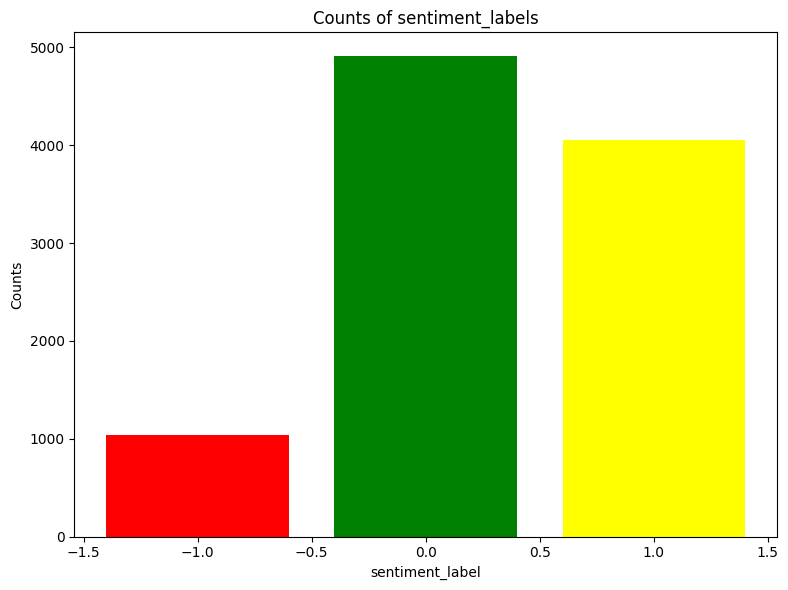

In [20]:
# Given data
sentiment_label = df['label'].value_counts()

# Create a bar chart
plt.figure(figsize=(8,6))
plt.bar(sentiment_label.index,sentiment_label.values, color=['green', 'yellow', 'red'])
plt.xlabel('sentiment_label')
plt.ylabel('Counts')
plt.title('Counts of sentiment_labels')
plt.tight_layout()

# Display the chart
plt.show()


In [21]:
df['agreement'].value_counts()

1.000000    5866
0.666667    3894
0.333333     239
Name: agreement, dtype: int64

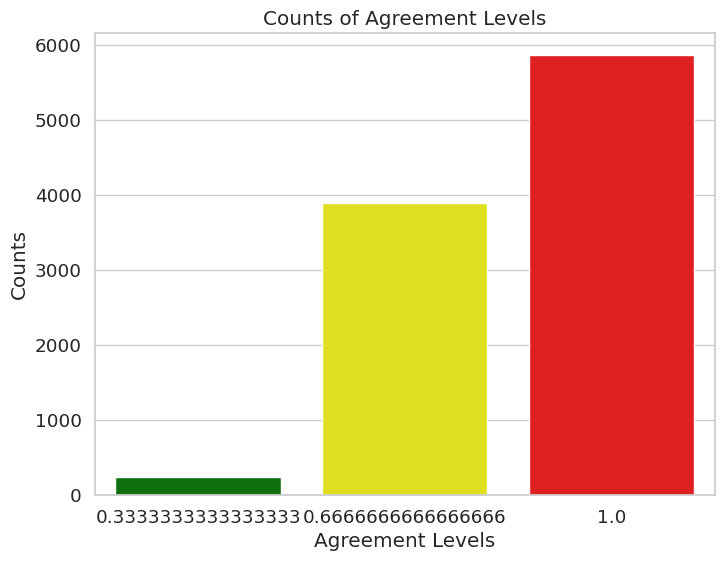

In [22]:
agreement_levels =df['agreement'].value_counts()

# Setting up the style and context for a nicer plot
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create a bar chart using seaborn
plt.figure(figsize=(8,6))
sns.barplot(x=agreement_levels.index, y=agreement_levels.values, palette=['green', 'yellow', 'red'])
plt.xlabel('Agreement Levels')
plt.ylabel('Counts')
plt.title('Counts of Agreement Levels')

# Display the chart
plt.show()



- **1.000000 (5866 occurrences)**:
  - This suggests full agreement among the annotators. Every annotator felt the sentiment or stance expressed in these texts was the same (e.g., all felt it was positive, negative, or neutral towards vaccination). This could mean that these texts have clear sentiments, like "Vaccines are life-saving!" (clearly positive) or "Vaccines cause harm!" (clearly negative).

- **0.666667 (3,894 occurrences)**:
  - This would mean that there's a majority agreement among the annotators, but not a unanimous one. Assuming three annotators, two agreed on the sentiment or stance, but one felt differently. These texts might be more ambiguous or open to interpretation, such as "I've read both good and bad things about vaccines."

- **0.333333 (239 occurrences)**:
  - This indicates a minority agreement. Again, assuming three annotators, only one felt a particular sentiment while the other two felt differently. This could represent texts that are even more ambiguous, nuanced, or perhaps they contain sarcasm which can be challenging to consistently label.


 Vaccine sentiment texts with high agreement levels provide more confidence in the sentiment label, as multiple humans interpreted the sentiment in the same way. On the other hand, texts with lower agreement levels might require further scrutiny, as they could be more controversial, nuanced, or not clearly leaning in a particular sentiment direction.

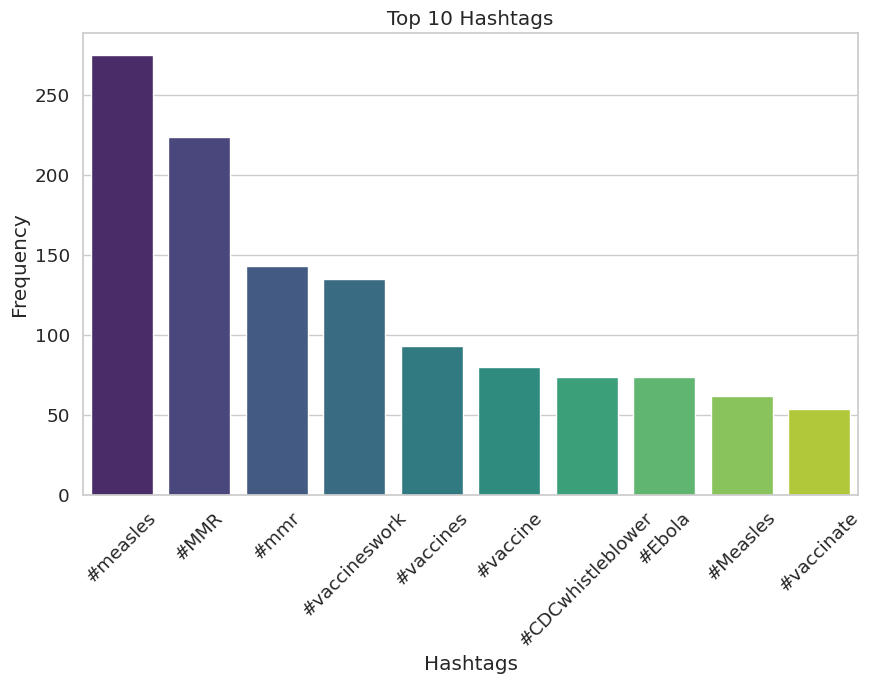

In [25]:
# Extract hashtags from the 'safe_text' column
hashtags = df['safe_text'].str.findall(r'#\w+')

# Flatten the list of lists into a single list of hashtags
hashtags = [item for sublist in hashtags for item in sublist]

# Count the frequency of each hashtag
hashtag_freq = Counter(hashtags)

# Get the top 10 hashtags
top_10_hashtags = dict(hashtag_freq.most_common(10))

# Create a bar plot to visualize the top 10 hashtags with the 'viridis' color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_10_hashtags.keys()), y=list(top_10_hashtags.values()), palette='viridis')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.title('Top 10 Hashtags')
plt.xticks(rotation=45)
plt.show()

The bar plot reveals the top 10 hashtags that are most frequently used in the Twitter posts within the dataset Each hashtag represents a topic or theme discussed in the Twitter posts. By examining the top hashtags, we identify the most prevalent topics of discussion among Twitter users.

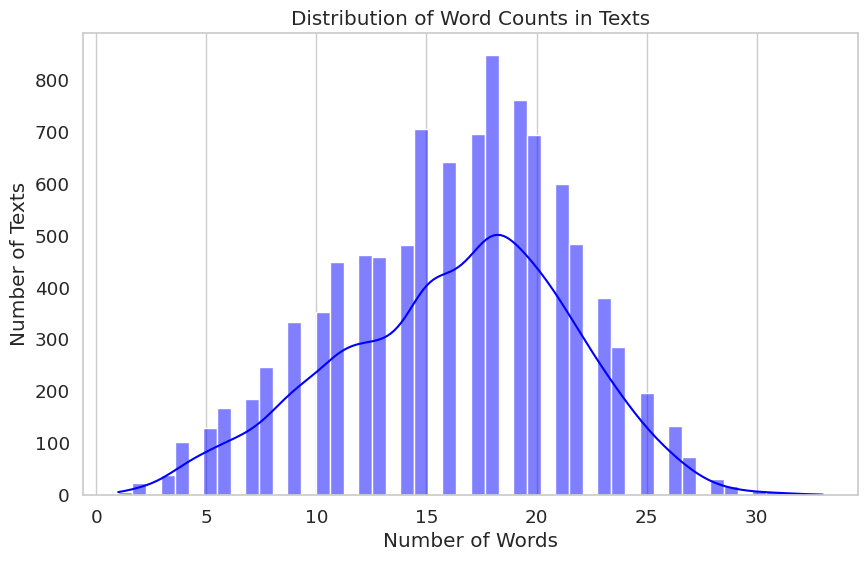

In [27]:
#computes the number of words in each tweet
text_len = df['safe_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,6))
sns.histplot(text_len, bins=50, color='blue', kde=True)
plt.title('Distribution of Word Counts in Texts')
plt.xlabel('Number of Words')
plt.ylabel('Number of Texts')
plt.grid(axis='y')
plt.show()

# **Data Cleaning**



**Text Analysis for safe_tweet column**

**Noise**
remove mentions/userhandles,
remove hashtags,
urls,
emojis,
special char

In [28]:
def tweet_cleaner_custom(text):
    # Initial cleaning steps
    new_text = re.sub(r"&amp;", "&", text)
    new_text = re.sub(r"http\S+|www\S+|https\S+", '', new_text, flags=re.MULTILINE)
    new_text = re.sub(r'@\w+', '', new_text)
    new_text = re.sub(r'#\w+', '', new_text)
    new_text = contractions.fix(new_text)
    new_text = re.sub(r"[^\w\s]", '', new_text)
    new_text = text.lower().strip()
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"'s\b", " is", new_text)
    new_text = re.sub(r'<user>', '', new_text, flags=re.MULTILINE)
    new_text = re.sub(r'<url>', '', new_text, flags=re.MULTILINE)

    cleaned_text = ''
    for token in new_text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '

    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    return cleaned_text


# Tweet Text Cleaning Function

The `tweet_cleaner_custom` function is designed to preprocess and clean raw text data from tweets. This is essential in natural language processing (NLP) tasks, such as sentiment analysis, where the quality of input text significantly impacts model performance.

## Cleaning Steps:

1. **Replace HTML Encoded Characters:**
   - `re.sub(r"&amp;", "&", text)`: Replaces HTML-encoded ampersand with the actual ampersand symbol.

2. **Remove URLs:**
   - `re.sub(r"http\S+|www\S+|https\S+", '', new_text, flags=re.MULTILINE)`: Removes URLs from the text.

3. **Remove Twitter User Mentions:**
   - `re.sub(r'@\w+', '', new_text)`: Eliminates Twitter user mentions (e.g., @username).

4. **Remove Hashtags:**
   - `re.sub(r'#\w+', '', new_text)`: Removes hashtags from the text.

5. **Fix Contractions:**
   - `contractions.fix(new_text)`: Expands contractions (e.g., "don't" becomes "do not").

6. **Remove Special Characters:**
   - `re.sub(r"[^\w\s]", '', new_text)`: Removes non-alphanumeric characters, keeping only letters and numbers.

7. **Convert to Lowercase:**
   - `text.lower().strip()`: Converts the entire text to lowercase and removes leading/trailing whitespaces.

8. **Remove Twitter-Specific Tags:**
   - `re.sub(r'<user>', '', new_text, flags=re.MULTILINE)`: Removes "<user>" tags used to represent Twitter users.
   - `re.sub(r'<url>', '', new_text, flags=re.MULTILINE)`: Removes "<url>" tags used to represent URLs.

9. **Lemmatization:**
   - Tokenizes the cleaned text and lemmatizes each token using the WordNet lemmatizer.

10. **Remove Extra Whitespaces:**
    - `re.sub(r'\s+', ' ', cleaned_text).strip()`: Replaces multiple consecutive whitespaces with a single space.




In [29]:
cleaned_tweets = []  # list of cleaned tweets
for word in df['safe_text']:
    cleaned_tweets.append(tweet_cleaner_custom(word))

In [30]:
df['cleaned_safe_text'] = cleaned_tweets

df.head()

,tweet_id,safe_text,label,agreement,cleaned_safe_text
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0,me amp the big homie meanboy meanboy mb mb mmr...
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0,i m thinking of devoting my career to proving ...
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0,whatcausesautism vaccine do not vaccinate your...
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0,i mean if they immunize my kid with something ...
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0,thanks to user catch me performing at la nuit ...


In [31]:
all_words = []
for t in df['safe_text']:
    all_words.extend(t.split())

print(all_words[:50])
len(set(all_words))

['Me', '&amp;', 'The', 'Big', 'Homie', 'meanboy3000', '#MEANBOY', '#MB', '#MBS', '#MMR', '#STEGMANLIFE', '@', 'Stegman', 'St.', '<url>', "I'm", '100%', 'thinking', 'of', 'devoting', 'my', 'career', 'to', 'proving', 'autism', "isn't", 'caused', 'by', 'vaccines', 'due', 'to', 'the', 'IDIOTIC', 'posts', "I've", 'seen', 'about', 'World', 'Autism', 'Day', '#whatcausesautism', 'VACCINES,', 'DO', 'NOT', 'VACCINATE', 'YOUR', 'CHILD', 'I', 'mean', 'if']


27096

In [32]:
clean_words = []
for t in df['cleaned_safe_text']:
    clean_words.extend(t.split())

print(clean_words[:50])
len(set(clean_words))

['me', 'amp', 'the', 'big', 'homie', 'meanboy', 'meanboy', 'mb', 'mb', 'mmr', 'stegmanlife', 'stegman', 'st', 'url', 'i', 'm', 'thinking', 'of', 'devoting', 'my', 'career', 'to', 'proving', 'autism', 'isn', 't', 'caused', 'by', 'vaccine', 'due', 'to', 'the', 'idiotic', 'post', 'i', 've', 'seen', 'about', 'world', 'autism', 'day', 'whatcausesautism', 'vaccine', 'do', 'not', 'vaccinate', 'your', 'child', 'i', 'mean']


11767

## Initial Number of Words:
- **Before Cleaning:** 27,096 words

## Post-Cleaning Number of Words:
- **After Cleaning:** 11,767 words

## Cleaning Impact:
The application of the tweet text cleaning function has led to a significant decrease in the total number of words. This reduction is primarily attributed to the removal of various elements such as URLs, Twitter user mentions, hashtags, special characters, and other noise commonly found in raw tweet data.

The cleaning process aims to improve the quality of text data for sentiment analysis or natural language processing tasks.



In [33]:
df['cleaned_safe_text'][:50]

0     me amp the big homie meanboy meanboy mb mb mmr...
1     i m thinking of devoting my career to proving ...
2     whatcausesautism vaccine do not vaccinate your...
3     i mean if they immunize my kid with something ...
4     thanks to user catch me performing at la nuit ...
5     user a nearly year old study when mental healt...
6     study of more than kid find no link between mm...
7                        psa vaccinate your fucking kid
8     coughing extra on the shuttle and everyone thi...
9     aid vaccine created at oregon health amp scien...
10    user this point i have text butw bon jovi cove...
11    my prediction vaccine exemption in arizona wil...
12    getting my vaccine china nervous moving with c...
13    mug noche user mmr mixmasterrod dcdj mmr mad h...
14    got my influenza vaccine purdue university stu...
15    sb enroll meningococcal disease pupil to be im...
16    increasing number of parent skip vaccination f...
17    user thank you for standing with ca parent

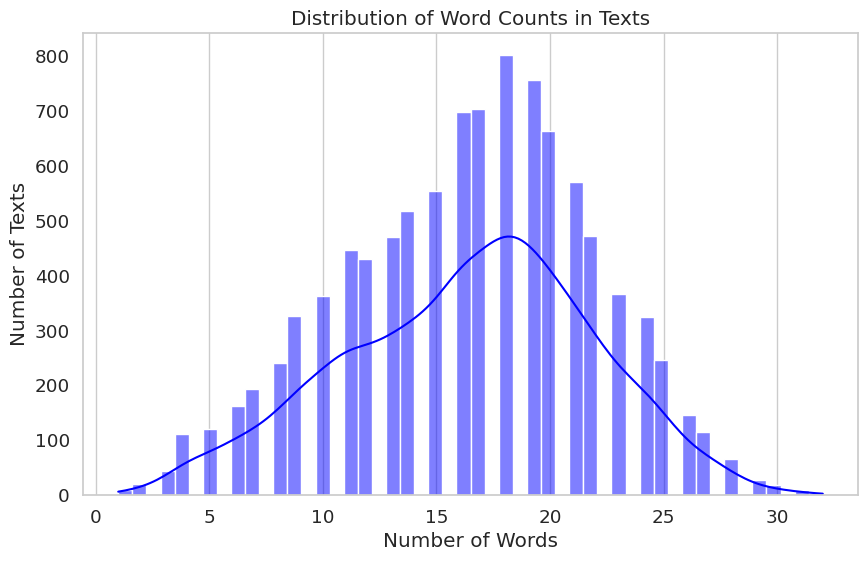

In [34]:
#computes the number of words in each cleaned tweet
text_len = df['cleaned_safe_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,6))
sns.histplot(text_len, bins=50, color='blue', kde=True)
plt.title('Distribution of Word Counts in Texts')
plt.xlabel('Number of Words')
plt.ylabel('Number of Texts')
plt.grid(axis='y')
plt.show()



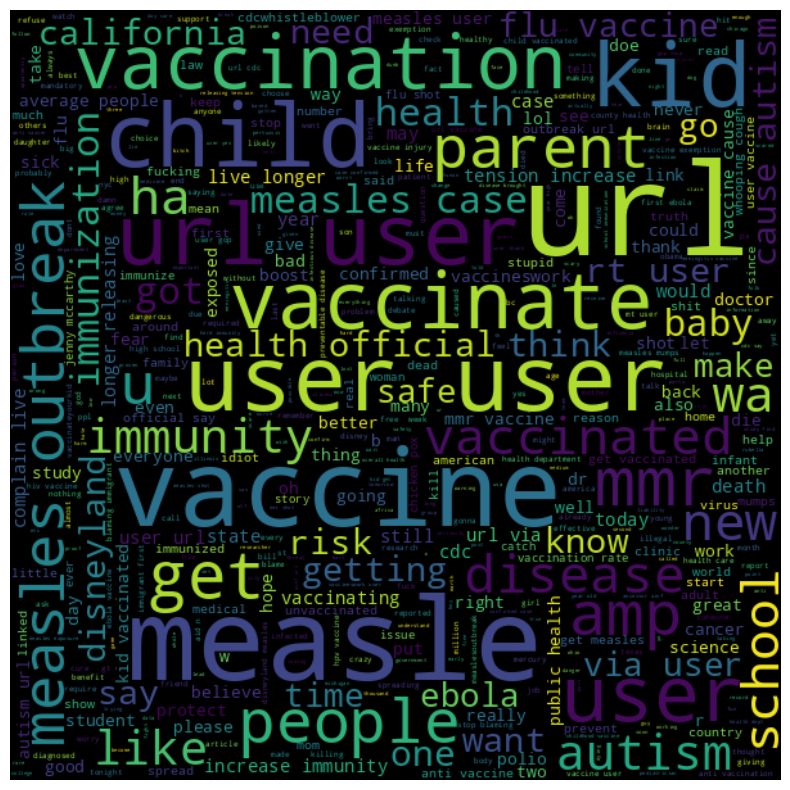

In [35]:
# Start with one review:
tweets = " ".join(df.cleaned_safe_text)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(tweets)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Word Cloud Analysis of Training Dataset Tweets

The presented plot showcases a word cloud generated from the tweet text in the training dataset. Key insights include:

- **Word Size Representation:** The size of each word in the cloud corresponds to its frequency in the tweet text. Larger fonts are assigned to more frequently occurring words, making them easily identifiable.

- **Prominent Vaccination-Related Words:** Common words associated with vaccination topics and public health, such as **vaccine**, **vaccinate**, and **vaccination**, stand out prominently in the word cloud. This emphasizes the prevalence of these terms in the dataset.

- **Qualitative Textual Insights:** The visualization offers a qualitative perspective on the textual content within the dataset. It effectively highlights the significance of specific words or phrases, providing valuable context and insights related to the discussed topics.


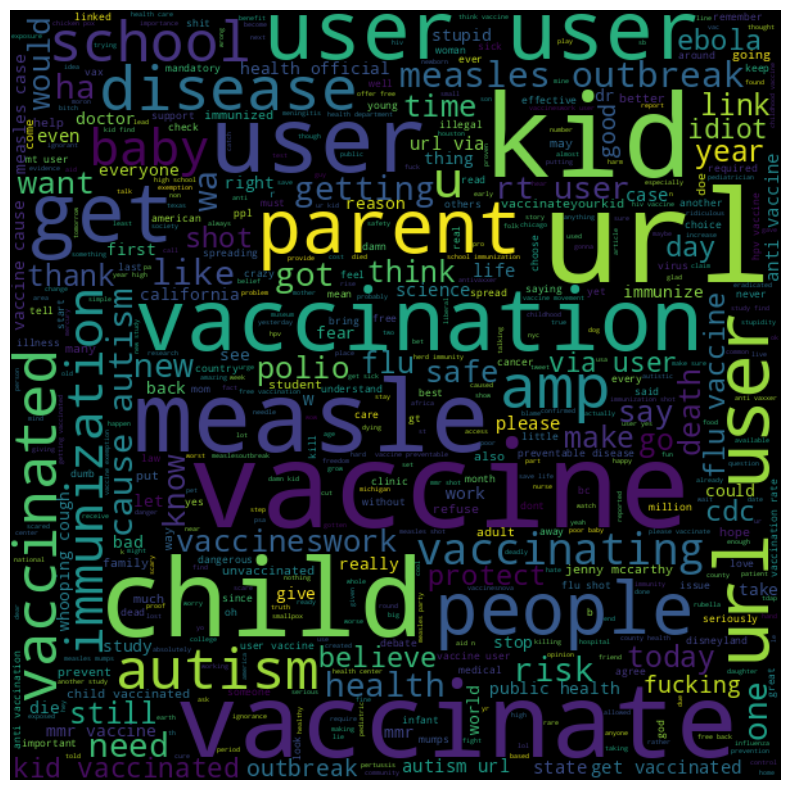

In [36]:
# Filter the dataframe for only positive sentiment (=1) entries
positive_tweets_df = df[df['label'] == 1]

# Combine the cleaned texts of the positive tweets into one long string
tweets = " ".join(positive_tweets_df.cleaned_safe_text)

plt.figure(figsize=(20,10))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600, width=600, max_font_size=100, max_words=500, stopwords=stopwords).generate(tweets)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


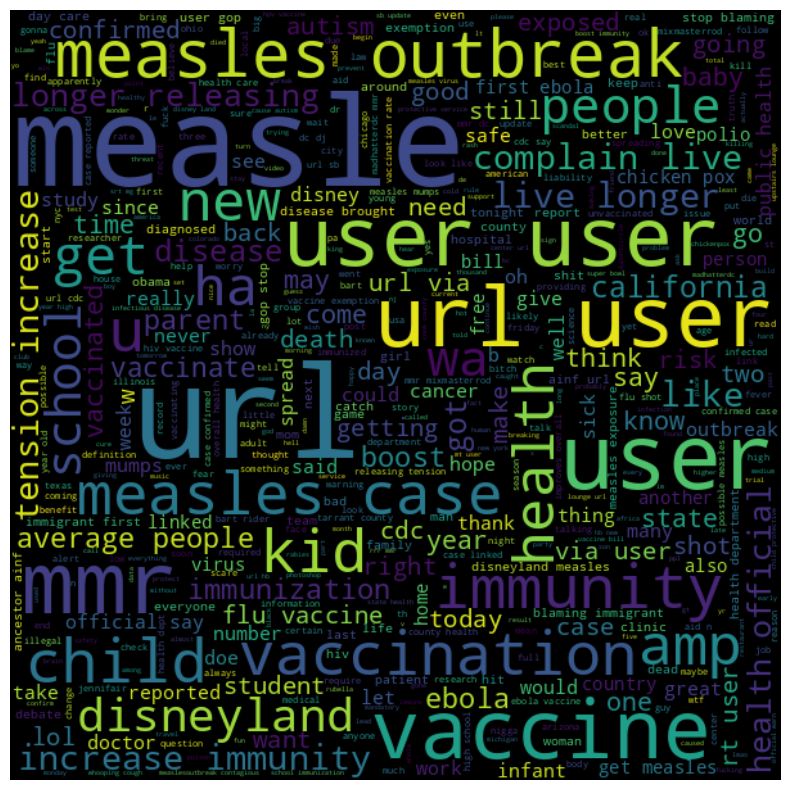

In [37]:
# Filter the dataframe for only neutral sentiment (=0) entries
neutral_tweets_df = df[df['label'] == 0]

# Combine the cleaned texts of the neutral tweets into one long string
tweets = " ".join(neutral_tweets_df.cleaned_safe_text)

plt.figure(figsize=(20,10))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600, width=600, max_font_size=100, max_words=500, stopwords=stopwords).generate(tweets)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


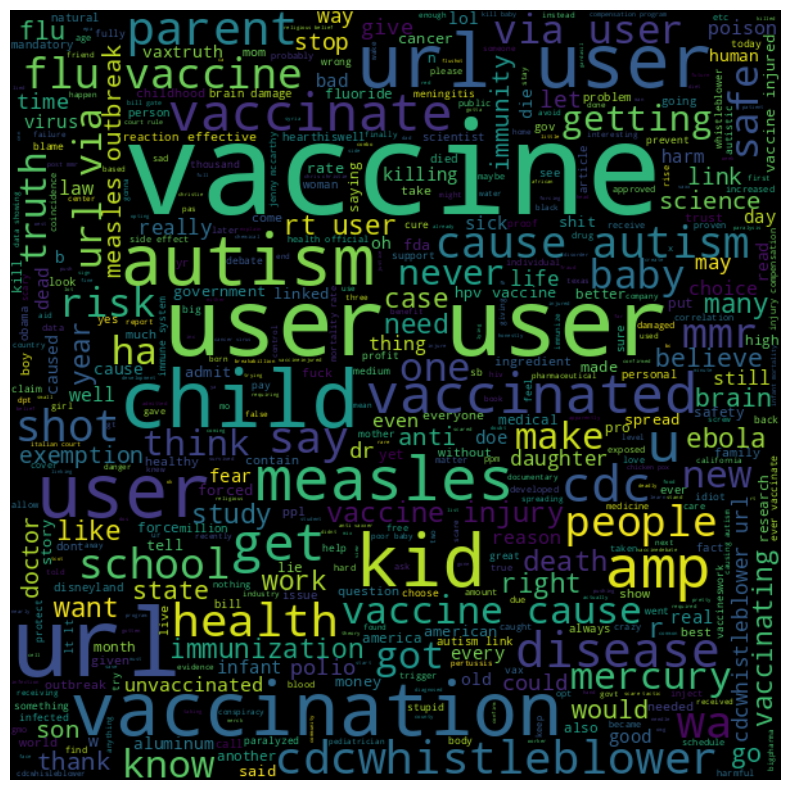

In [38]:
# Filter the dataframe for only negative sentiment (=1) entries
negative_tweets_df = df[df['label'] == -1]

# Combine the cleaned texts of the negative tweets into one long string
tweets = " ".join(negative_tweets_df.cleaned_safe_text)

plt.figure(figsize=(20,10))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600, width=600, max_font_size=100, max_words=500, stopwords=stopwords).generate(tweets)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


I manually split the training set to have a training subset ( a dataset the model will learn on), and an evaluation subset ( a dataset the model with use to compute metric scores to help use to avoid some training problems like [the overfitting](https://www.ibm.com/cloud/learn/overfitting) one ).


In [39]:
# Split the train data => {train, eval}
train, eval = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

In [40]:
train.head()

,tweet_id,safe_text,label,agreement,cleaned_safe_text
9305,YMRMEDME,Mickey's Measles has gone international <url>,0.0,1.000000,mickey s measles ha gone international url
3907,5GV8NEZS,S1256 [NEW] Extends exemption from charitable ...,0.0,1.000000,s new extends exemption from charitable immuni...
795,EI10PS46,<user> your ignorance on vaccines isn't just ...,1.0,0.666667,user your ignorance on vaccine isn t just dang...
5793,OM26E6DG,Pakistan partly suspends polio vaccination pro...,0.0,1.000000,pakistan partly suspends polio vaccination pro...
3431,NBBY86FX,In other news I've gone up like 1000 mmr,0.0,1.000000,in other news i ve gone up like mmr


In [41]:
eval.head()

,tweet_id,safe_text,label,agreement,cleaned_safe_text
6571,R7JPIFN7,Children's Museum of Houston to Offer Free Vac...,1.0,1.000000,child s museum of houston to offer free vaccin...
1754,2DD250VN,<user> no. I was properly immunized prior to t...,1.0,1.000000,user no i wa properly immunized prior to the p...
3325,ESEVBTFN,<user> thx for posting vaccinations are impera...,1.0,1.000000,user thx for posting vaccination are imperativ...
1485,S17ZU0LC,This Baby Is Exactly Why Everyone Needs To Vac...,1.0,0.666667,this baby is exactly why everyone need to vacc...
4175,IIN5D33V,"Meeting tonight, 8:30pm in room 322 of the stu...",1.0,1.000000,meeting tonight pm in room of the student cent...


In [42]:
print(f"new dataframe shapes: train is {train.shape}, eval is {eval.shape}")

new dataframe shapes: train is (7999, 5), eval is (2000, 5)


In [43]:
# Save splitted subsets

# Define file path

file_path = '/content/drive/MyDrive/NLP_LP5'

#"/content/drive/MyDrive/NLP_LP5 "

train.to_csv(os.path.join(file_path, "train_subset.csv"), index=False)
eval.to_csv(os.path.join(file_path, "eval_subset.csv"), index=False)

In [44]:
# Define paths and model name

model_name = 'cardiffnlp/twitter-roberta-base-sentiment-latest'


In [45]:
# One-hot encode labels
def transform_labels_to_onehot(example):
    label = example['label']
    if label == -1: # 'Negative'
        return {'label': [1, 0, 0]}
    elif label == 0: # 'Neutral'
        return {'label': [0, 1, 0]}
    elif label == 1: # 'Positive'
        return {'label': [0, 0, 1]}


In [46]:
# Load the dataset
datasets = load_dataset('csv', data_files={
        'train': '/content/drive/MyDrive/NLP_LP5/train_subset.csv',
        'eval': '/content/drive/MyDrive/NLP_LP5/eval_subset.csv'
    }, encoding='ISO-8859-1')

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating eval split: 0 examples [00:00, ? examples/s]

In [47]:
# Remove the 'safe_text', 'agreement', and 'tweet_id' columns from the 'datasets' object
datasets = datasets.remove_columns(['safe_text', 'agreement', 'tweet_id'])



In [48]:
# Apply one-hot encoding transformation to the labels in the dataset
datasets = datasets.map(transform_labels_to_onehot)


Map:   0%|          | 0/7999 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [49]:
# Set the device for PyTorch operations based on GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [50]:
# Extracting labels from the training dataset
label = train['label'].tolist()

# Compute class weights to handle class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(label), y=label)

# Create a dictionary mapping class indices to their respective weights
class_weights_dict = {0: class_weights[0], 1: class_weights[1], 2: class_weights[2]}

# Convert the class weights to a PyTorch tensor and move it to the specified device (GPU or CPU)
class_weights_tensor = torch.tensor([class_weights_dict[i] for i in range(len(class_weights_dict))], dtype=torch.float).to(device)


In [51]:
print(class_weights)  # This should give you an array of weights.
print(class_weights_dict)  # This should give you a dictionary mapping class indices to their weights.


[3.20858404 0.67914756 0.82243471]
{0: 3.208584035298837, 1: 0.6791475632535235, 2: 0.8224347110836931}


In [52]:
print(class_weights_tensor)
print(class_weights_tensor.device)  # Should match the device you're training on (e.g., 'cuda:0')


tensor([3.2086, 0.6791, 0.8224], device='cuda:0')
cuda:0


In [53]:
# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)


In [54]:
# Preprocessing function
def preprocess_function(examples):
    return tokenizer(examples['cleaned_safe_text'], padding='max_length', max_length=128)

# Tokenize the datasets
try:
    encoded_datasets = datasets.map(preprocess_function, batched=True)
except Exception as e:
    print(f"An error occurred during tokenization using {model_name}: {e}")
    raise  # Raise exception to halt the execution


Map:   0%|          | 0/7999 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [55]:
# Load the model
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [56]:
# Custom Trainer class with custom loss function using class weights
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fct = CrossEntropyLoss(weight=class_weights_tensor)
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

    def create_optimizer_and_scheduler(self, num_training_steps: int):
        # This is necessary to create the scheduler at the right time within the Trainer
        super().create_optimizer_and_scheduler(num_training_steps)
        self.lr_scheduler = ReduceLROnPlateau(
            self.optimizer,
            mode='min',
            factor=0.1,
            patience=1,
            verbose=True
        )


In [57]:
# Define the training arguments
training_args = TrainingArguments(
    output_dir=f'twitter_roberta_sentiment_model',
    num_train_epochs=2,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.2,
    logging_dir=f'./logs_{model_name}',
    logging_steps=100,
    evaluation_strategy="steps",
    save_strategy="steps",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    learning_rate=2e-5,
    group_by_length=True,
    push_to_hub=True
)

def compute_metrics(p):
    pred, labels= p

    # Convert predictions to class index format
    pred = np.argmax(pred, axis=1)

    # If true labels are in one-hot encoded format, convert them to class index format
    if len(labels.shape) > 1 and labels.shape[1] > 1:
        labels = np.argmax(labels, axis=1)

    acc = accuracy_score(labels, pred)

    return {"accuracy": acc}

# Initialize the trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_datasets["train"],
    eval_dataset=encoded_datasets["eval"],
    compute_metrics=compute_metrics,
)
# Train the model
try:
    trainer.train()
except Exception as e:
    print(f"An error occurred while training the model {model_name}: {e}")
    raise  # Raise exception to halt the execution

# Evaluate the model
try:
    results = trainer.evaluate()
    print(f"Results for {model_name}: {results}")
except Exception as e:
    print(f"An error occurred during evaluation of the model {model_name}: {e}")
    raise

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Step,Training Loss,Validation Loss,Accuracy
100,0.661900,0.522570,0.628500
200,0.452600,0.414964,0.716000
300,0.409200,0.389781,0.728000
400,0.388600,0.344120,0.773000
500,0.382200,0.349444,0.767000
600,0.339600,0.347033,0.786500
700,0.315600,0.341764,0.787500
800,0.309900,0.323080,0.794000
900,0.299400,0.337110,0.788500
1000,0.290700,0.318882,0.805000


Results for cardiffnlp/twitter-roberta-base-sentiment-latest: {'eval_loss': 0.31888246536254883, 'eval_accuracy': 0.805, 'eval_runtime': 13.4174, 'eval_samples_per_second': 149.061, 'eval_steps_per_second': 9.316, 'epoch': 2.0}


# Training Configuration

This code block defines the training arguments and initializes the trainer for training and evaluation of a sentiment analysis model using the Hugging Face Transformers library.

### Training Arguments:
- `output_dir`: Specifies the directory to save the trained model.
- `num_train_epochs`: Number of training epochs.
- `per_device_train_batch_size` and `per_device_eval_batch_size`: Batch sizes for training and evaluation on each device.
- `warmup_steps`: Number of warm-up steps for the learning rate scheduler.
- `weight_decay`: Weight decay applied to the optimizer.
- `logging_dir` and `logging_steps`: Directory for training logs and the frequency of logging.
- `evaluation_strategy`: Evaluation strategy, set to "steps" to evaluate at fixed steps during training.
- `save_strategy`: Saving strategy, set to "steps" to save the model at fixed steps.
- `load_best_model_at_end`: Load the best model based on the specified metric at the end of training.
- `metric_for_best_model`: Metric used to determine the best model (e.g., accuracy).
- `learning_rate`: Initial learning rate for the optimizer.
- `group_by_length`: Grouping batches by length during training.

### Compute Metrics Function:
- The `compute_metrics` function calculates the accuracy metric based on predictions and true labels.

### Trainer Initialization:
- The trainer is initialized with the model, training arguments, training dataset (`encoded_datasets["train"]`), evaluation dataset (`encoded_datasets["eval"]`), and the compute metrics function.

### Training and Evaluation:
- The model is trained using the `trainer.train()` method, and any errors are caught and printed.
- The trained model is evaluated using the `trainer.evaluate()` method, and results are printed.




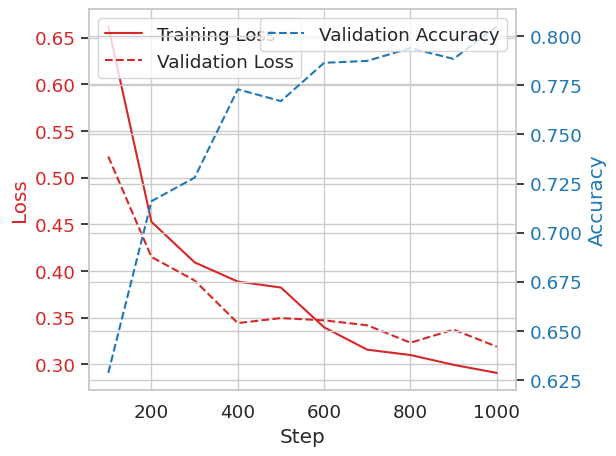

In [58]:
# After training is completed, you can access the log history for plotting
training_logs = trainer.state.log_history

# Initialize lists to store the metrics for plotting
train_loss_set = []
eval_loss_set = []
train_acc_set = []
eval_acc_set = []
steps_set = []
eval_steps = []

# Loop through the training logs
for log in training_logs:
    if 'loss' in log and 'epoch' in log:  # Training loss
        train_loss_set.append(log['loss'])
        steps_set.append(log['step'])
    if 'eval_loss' in log and 'eval_accuracy' in log:  # Evaluation loss and accuracy
        eval_loss_set.append(log['eval_loss'])
        eval_acc_set.append(log['eval_accuracy'])
        eval_steps.append(log['step'])

# Plotting
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Step')
ax1.set_ylabel('Loss', color=color)
ax1.plot(steps_set, train_loss_set, label='Training Loss', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# We need to ensure that eval points are aligned with training steps if logging frequencies differ
ax1.plot(eval_steps, eval_loss_set, label='Validation Loss', color=color, linestyle='dashed')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(eval_steps, eval_acc_set, label='Validation Accuracy', color=color, linestyle='dashed')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()


In [59]:
trainer.push_to_hub()


'https://huggingface.co/Faith-theAnalyst/twitter_roberta_sentiment_model/tree/main/'

In [60]:
tokenizer.push_to_hub('twitter_roberta_sentiment_model')

CommitInfo(commit_url='https://huggingface.co/Faith-theAnalyst/twitter_roberta_sentiment_model/commit/6c2f7ed89ed633e041a8e47409d3c4b249dce8d0', commit_message='Upload tokenizer', commit_description='', oid='6c2f7ed89ed633e041a8e47409d3c4b249dce8d0', pr_url=None, pr_revision=None, pr_num=None)